In [1]:
#Importing the libraries

import seaborn as sn
import pandas as pd
import numpy as np
import random as rd
import statistics as st
import matplotlib.pyplot as plt
import sklearn as sk

In [5]:
# Extracting the data 

path = "C:/Users/prudh/OneDrive/Desktop/PDS/Assignment2/diabetes.csv"
data_raw = pd.read_csv(path)

#first 5 rows

data_raw.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# Checking if there are any null values in the data

data_raw.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
# No null values present, we can use the same raw data

data_raw.to_csv("C:/Users/prudh/OneDrive/Desktop/PDS/Assignment2/CleanData/clean_data.csv")

In [10]:
#Taking a random 25 samples from the total dataset

data_sample= data_raw.sample(n= 25, random_state= 42)

data_sample.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
668,6,98,58,33,190,34.0,0.430,43,0
324,2,112,75,32,0,35.7,0.148,21,0
624,2,108,64,0,0,30.8,0.158,21,0
690,8,107,80,0,0,24.6,0.856,34,0
473,7,136,90,0,0,29.9,0.210,50,0


In [34]:
# Printing the no.of rows and columns in the sample we took

print("Number of Rows: {}\nNumber of Columns: {}".format(data_sample.shape[0], data_raw.shape[1]))

Number of Rows: 25
Number of Columns: 9


In [35]:
#find the mean Glucose of the sample

mean_glucose_sample = st.mean(data_sample.loc[:,"Glucose"])
print(mean_glucose_sample)
mean_val = [mean_glucose_sample]

116.64


In [36]:
#find the max Glucose of the sample

max_glucose_sample = max(data_sample.loc[:,"Glucose"])
print(max_glucose_sample)
max_val = [max_glucose_sample]

183


In [37]:
#find the mean Glucose of the whole data

mean_glucose_population = st.mean(data_raw.loc[:,"Glucose"])
print(mean_glucose_population)
mean_val.append(mean_glucose_population)
mean_var = ["mean_sample", "mean_population"]
print (mean_val)
print (mean_var)

120.89453125
[116.64, 120.89453125]
['mean_sample', 'mean_population']


In [38]:
#find the max Glucose of whole data

max_glucose_population = max(data_raw.loc[:,"Glucose"])
print(max_glucose_population)
max_val.append(max_glucose_population)
max_var = ["max_sample", "max_population"]
print (max_val)
print (max_var)

199
[183, 199]
['max_sample', 'max_population']


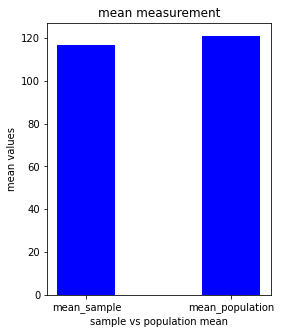

In [40]:
# creating the bar plot for the sample vs population mean

fig = plt.figure(figsize = (4, 5))

plt.bar(mean_var, mean_val, color ='blue',
        width = 0.4)
 
plt.xlabel("sample vs population mean")
plt.ylabel("mean values")
plt.title("mean measurement")


plt.savefig("C:/Users/prudh/OneDrive/Desktop/PDS/Assignment2/Results/A/mean_image.jpeg")

plt.show()

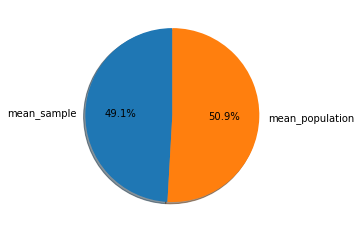

In [41]:
# Creating the pie graph

plt.pie(mean_val, labels = mean_var, autopct='%1.1f%%', shadow=True, startangle=90)

plt.savefig("C:/Users/prudh/OneDrive/Desktop/PDS/Assignment2/Results/A/pie_image.jpeg")

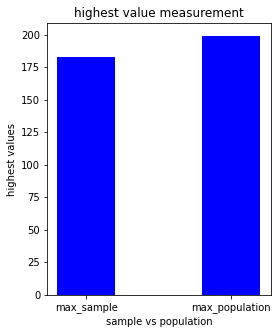

In [42]:
# Creating the bar plot for the sample vs population max values

fig = plt.figure(figsize = (4, 5))
 

plt.bar(max_var, max_val, color ='blue',
        width = 0.4)
 
plt.xlabel("sample vs population")
plt.ylabel("highest values")
plt.title("highest value measurement")

plt.savefig("C:/Users/prudh/OneDrive/Desktop/PDS/Assignment2/Results/A/max_barimage.jpeg")



plt.show()

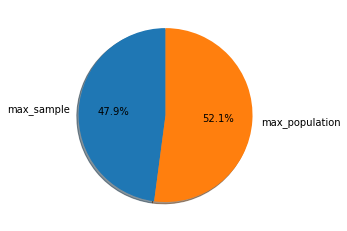

In [43]:
# Creating the pie graph

plt.pie(max_val, labels = max_var , autopct='%1.1f%%', shadow=True, startangle=90)

plt.savefig("C:/Users/prudh/OneDrive/Desktop/PDS/Assignment2/Results/A/max_pieimage.jpeg")

In [46]:
#finding the 98th percentile of sample data

sample_percentile = np.percentile(data_sample.loc[:,"BMI"], 98)
print(sample_percentile)

#Storing the percentile values in the list

percentile_values = [sample_percentile]

40.248


In [47]:
#finding the 98th percentile of population data

population_percentile = np.percentile(data_raw.loc[:,"BMI"], 98)
print(population_percentile)

#Appending the population percentile value to the list
percentile_values.append(population_percentile)

#Creating a list and storing the variables 

percentile_vars = ["sample_percentile", "population_percentile"]

47.52599999999996


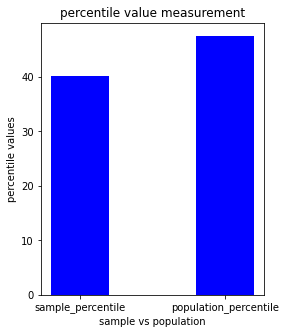

In [48]:
# Ploting the bar graph between the sample and population percentile

fig = plt.figure(figsize = (4, 5))
 

plt.bar(percentile_vars, percentile_values, color ='blue',
        width = 0.4)
 
plt.xlabel("sample vs population")
plt.ylabel("percentile values")
plt.title("percentile value measurement")

plt.savefig("C:/Users/prudh/OneDrive/Desktop/PDS/Assignment2/Results/B/percentile_barimage.jpeg")


plt.show()

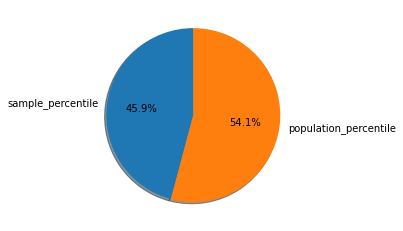

In [49]:
# showing the results in pie chart

plt.pie(percentile_values, labels = percentile_vars , autopct='%1.1f%%', shadow=True, startangle=90)
plt.savefig("C:/Users/prudh/OneDrive/Desktop/PDS/Assignment2/Results/B/percentile_pieimage.jpeg")

In [50]:
#Using bootstrap (replace= True), created 500 samples (of 150 observation each) from the actual given dataset

data_boot = sk.utils.resample(data_raw, replace=True, n_samples=500, random_state=150)

print(data_boot)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
228            4      197             70             39      744  36.7   
442            4      117             64             27      120  33.2   
507            1      130             60             23      170  28.6   
25            10      125             70             26      115  31.1   
496            5      110             68              0        0  26.0   
..           ...      ...            ...            ...      ...   ...   
732            2      174             88             37      120  44.5   
514            3       99             54             19       86  25.6   
750            4      136             70              0        0  31.2   
364            4      147             74             25      293  34.9   
485            0      135             68             42      250  42.3   

     DiabetesPedigreeFunction  Age  Outcome  
228                     2.329   31        0  
442                

In [55]:
from statistics import mean

In [58]:
# finding the mean BMI of the bootstrap sample

boot_mean_BMI = mean(data_boot.loc[:,"BMI"])
print(boot_mean_BMI)

#storing the bootstrapped mean value in a list
mean_values = [boot_mean_BMI]

31.8188


In [59]:
#find the std BMI of the bootstrap sample

boot_std_BMI = st.stdev(data_boot.loc[:,"BMI"])
print(boot_std_BMI)

#Storing the std values of the bootstrap samples in a list
std_values = [boot_std_BMI]

8.058660594736716


In [60]:
#find the percentile BMI of the bootstrap sample

boot_percentile_BMI = np.percentile(data_boot.loc[:,"BMI"], 98)
print(boot_percentile_BMI)

#Storing the percentile values of bootstrap samples in a list
percentile_values = [boot_percentile_BMI]

46.50599999999999


In [61]:
#find the mean BMI of the raw data

raw_mean_BMI = mean(data_raw.loc[:,"BMI"])
print(raw_mean_BMI)

#Appending the value to the mean values list
mean_values.append(raw_mean_BMI)

#Creating a list and storing the mean variables
mean_vars = ["bootstrap_mean", "raw_mean"]

31.992578125


In [62]:
#find the std BMI of the raw data

raw_std_BMI = st.stdev(data_raw.loc[:,"BMI"])
print(raw_std_BMI)

#Appending the values to the std values list
std_values.append(raw_std_BMI)

#Creating a list and storing the std variables
std_vars = ["bootstrap_std", "raw_std"]

7.884160320375446


In [63]:
#find the percentile BMI of the raw data

raw_percentile_BMI = np.percentile(data_raw.loc[:,"BMI"], 98)
print(raw_percentile_BMI)

#Appending the values to the percentile values list
percentile_values.append(raw_percentile_BMI)

#Creating a list and storing the percentile variables
percentile_vars = ["bootstrap_percentile", "raw_percentile"]

47.52599999999996


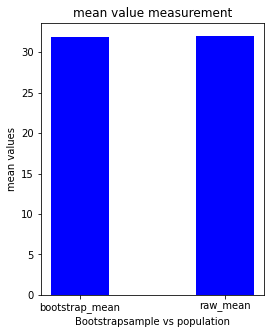

In [64]:
#Creating the bar PLot for mean values of bootstrap and raw data

fig = plt.figure(figsize = (4, 5))
 

plt.bar(mean_vars, mean_values, color ='blue',
        width = 0.4)
 
plt.xlabel("Bootstrapsample vs population")
plt.ylabel("mean values")
plt.title("mean value measurement")

plt.savefig("C:/Users/prudh/OneDrive/Desktop/PDS/Assignment2/Results/C/bootmean_barimage.jpeg")


plt.show()

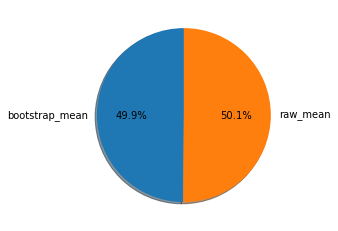

In [67]:
#Creating the pie chart

plt.pie(mean_values, labels = mean_vars , autopct='%1.1f%%', shadow=True, startangle=90)
plt.savefig("C:/Users/prudh/OneDrive/Desktop/PDS/Assignment2/Results/C/bootmean_pieimage.jpeg")

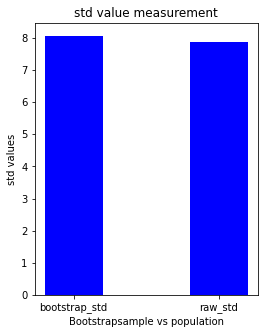

In [66]:
# Creating the bar plot for the std values of the bootstrap values and the raw data

fig = plt.figure(figsize = (4, 5))
 

plt.bar(std_vars, std_values, color ='blue',
        width = 0.4)
 
plt.xlabel("Bootstrapsample vs population")
plt.ylabel("std values")
plt.title("std value measurement")

plt.savefig("C:/Users/prudh/OneDrive/Desktop/PDS/Assignment2/Results/C/bootstd_barimage.jpeg")


plt.show()

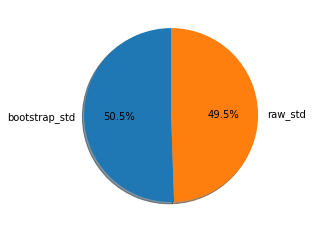

In [68]:
#Creating the pie chart

plt.pie(std_values, labels = std_vars , autopct='%1.1f%%', shadow=True, startangle=90)
plt.savefig("C:/Users/prudh/OneDrive/Desktop/PDS/Assignment2/Results/C/bootstd_pieimage.jpeg")

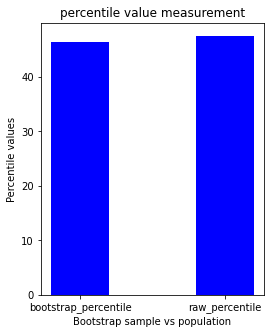

In [69]:
# Creating the bar plot for the percentile values of the bootstrap values and the raw data

fig = plt.figure(figsize = (4, 5))
 
# creating the bar plot
plt.bar(percentile_vars, percentile_values, color ='blue',
        width = 0.4)
 
plt.xlabel("Bootstrap sample vs population")
plt.ylabel("Percentile values")
plt.title("percentile value measurement")

plt.savefig("C:/Users/prudh/OneDrive/Desktop/PDS/Assignment2/Results/C/bootpercentile_barimage.jpeg")


plt.show()

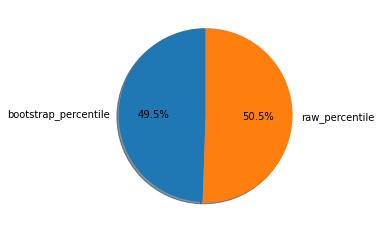

In [70]:
#Creating the pie chart

plt.pie(percentile_values, labels = percentile_vars , autopct='%1.1f%%', shadow=True, startangle=90)
plt.savefig("C:/Users/prudh/OneDrive/Desktop/PDS/Assignment2/Results/C/bootpercentile_pieimage.jpeg")